In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pandas_profiling
import folium
from folium import plugins
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [3]:
customer_example = pd.read_csv("customer_example.csv")
customer_example.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


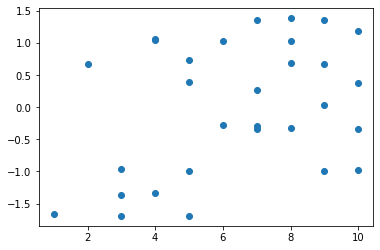

In [4]:
plt.scatter(customer_example.Satisfaction, customer_example.Loyalty)

In [5]:
kmeans = KMeans(n_clusters=2).fit(customer_example)
kmeans.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0])

In [9]:
from sklearn import metrics
metrics.silhouette_score(customer_example, kmeans.labels_)


0.5316993437803563

In [10]:
kmeans = KMeans(n_clusters=3).fit(customer_example)
metrics.silhouette_score(customer_example, kmeans.labels_)


0.41966915902631985

In [11]:
kmeans = KMeans(n_clusters=4).fit(customer_example)
metrics.silhouette_score(customer_example, kmeans.labels_)


0.37094423587698466

In [14]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(customer_example)
    distortions.append(kmeanModel.inertia_)

D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


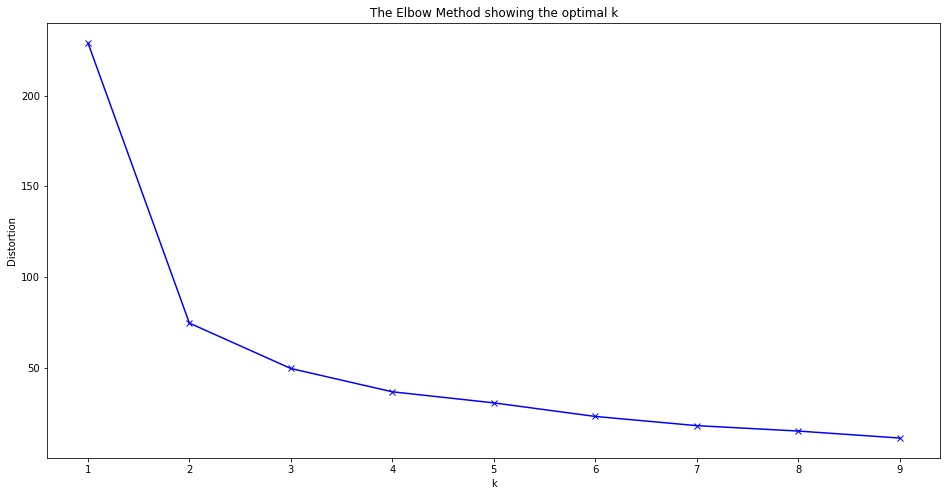

In [15]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

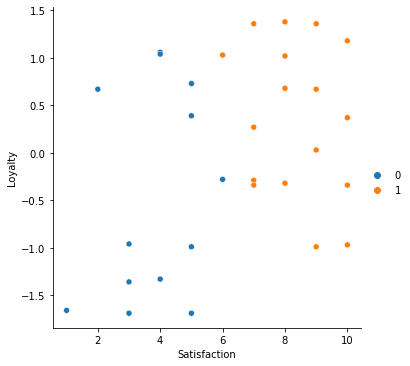

In [17]:
kmeans = KMeans(n_clusters=2).fit(customer_example)
sns.relplot(y="Loyalty",x="Satisfaction",data=customer_example,kind="scatter",hue=kmeans.labels_)

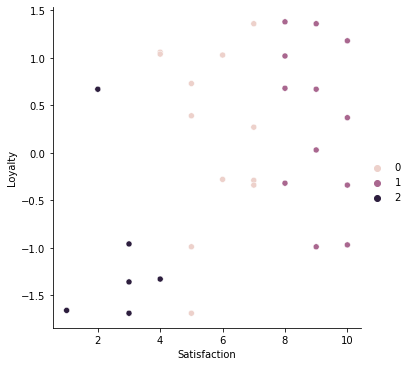

In [18]:
kmeans = KMeans(n_clusters=3).fit(customer_example)
sns.relplot(y="Loyalty",x="Satisfaction",data=customer_example,kind="scatter",hue=kmeans.labels_)

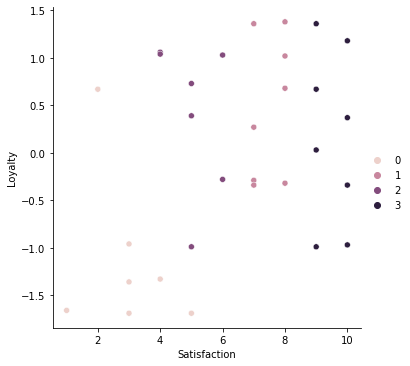

In [19]:
kmeans = KMeans(n_clusters=4).fit(customer_example)
sns.relplot(y="Loyalty",x="Satisfaction",data=customer_example,kind="scatter",hue=kmeans.labels_)

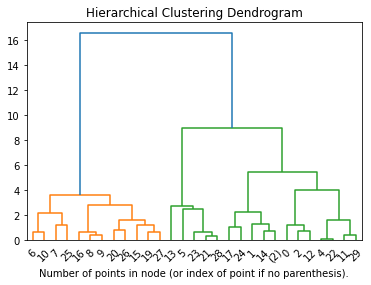

In [21]:

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(customer_example)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()